In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import linregress

In [2]:
# Load cleaned_movies into DataFrame
movies_df = pd.read_csv('movies_final.csv')
movies_df.head()

,Unnamed: 0,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
0,0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0
1,1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0
3,3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0
4,4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0


Preprocessing

In [3]:
# Drop Unnamed column
movies_df = movies_df.loc[:,~movies_df.columns.str.contains('^Unnamed')]
movies_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,111105497.0,20th Century Studios,100.0
7408,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7409,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,3661.0,Prowess Pictures,98.0
7410,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,413378.0,Pryor Entertainment,120.0


In [4]:
# Drop relase date columns
movies_df = movies_df.drop(columns=['released'], axis=1)
movies_df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0


In [5]:
# Load inflation indexer data
inflation_df = pd.read_csv('CPIAUCNS.csv')

# Change object to float
inflation_df['CPIAUCNS_NBD20210101'] = pd.to_numeric(inflation_df['CPIAUCNS_NBD20210101'], errors='coerce')

# Check for nulls
inflation_df['CPIAUCNS_NBD20210101'].isnull().sum()

1

In [6]:
# Drop nulls
inflation_df = inflation_df.dropna()
inflation_df

,DATE,CPIAUCNS_NBD20210101
0,1913-01-01,3.64739
1,1914-01-01,3.69660
2,1915-01-01,3.73043
3,1916-01-01,4.01644
4,1917-01-01,4.73300
...,...,...
104,2017-01-01,90.46013
105,2018-01-01,92.66969
106,2019-01-01,94.34906
107,2020-01-01,95.51294


In [7]:
# Create index multiplier
inflation_df['CPI_Multiplier'] = inflation_df['CPIAUCNS_NBD20210101'].iloc[-1] / inflation_df['CPIAUCNS_NBD20210101']
inflation_df

,DATE,CPIAUCNS_NBD20210101,CPI_Multiplier
0,1913-01-01,3.64739,27.416865
1,1914-01-01,3.69660,27.051886
2,1915-01-01,3.73043,26.806561
3,1916-01-01,4.01644,24.897671
4,1917-01-01,4.73300,21.128248
...,...,...,...
104,2017-01-01,90.46013,1.105459
105,2018-01-01,92.66969,1.079101
106,2019-01-01,94.34906,1.059894
107,2020-01-01,95.51294,1.046979


In [8]:
# Delete everything after year in DATE
inflation_df['DATE'] = inflation_df['DATE'].str.split('-').str[0]
inflation_df

,DATE,CPIAUCNS_NBD20210101,CPI_Multiplier
0,1913,3.64739,27.416865
1,1914,3.69660,27.051886
2,1915,3.73043,26.806561
3,1916,4.01644,24.897671
4,1917,4.73300,21.128248
...,...,...,...
104,2017,90.46013,1.105459
105,2018,92.66969,1.079101
106,2019,94.34906,1.059894
107,2020,95.51294,1.046979


In [9]:
# Change year to string prior to merge
movies_df['year'] = movies_df['year'].astype(str)
movies_df.dtypes

name         object
rating       object
genre        object
year         object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# Rename DATE column in inflation df to released to match prior to merge
inflation_df = inflation_df.rename(columns={'DATE':'year'})
inflation_df

,year,CPIAUCNS_NBD20210101,CPI_Multiplier
0,1913,3.64739,27.416865
1,1914,3.69660,27.051886
2,1915,3.73043,26.806561
3,1916,4.01644,24.897671
4,1917,4.73300,21.128248
...,...,...,...
104,2017,90.46013,1.105459
105,2018,92.66969,1.079101
106,2019,94.34906,1.059894
107,2020,95.51294,1.046979


In [11]:
# Merge dataframes
movies_df = pd.merge(movies_df, inflation_df, how = 'left', on= 'year')
movies_df

,name,rating,genre,year,score,votes,director,writer,star,country,gross,company,runtime,CPIAUCNS_NBD20210101,CPI_Multiplier
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0,30.41237,3.288136
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0,30.41237,3.288136
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0,30.41237,3.288136
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0,30.41237,3.288136
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0,30.41237,3.288136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,111105497.0,20th Century Studios,100.0,95.51294,1.046979
7408,The Eight Hundred,Not Rated,Action,2020,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,95.51294,1.046979
7409,The Quarry,R,Crime,2020,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,3661.0,Prowess Pictures,98.0,95.51294,1.046979
7410,Tulsa,PG-13,Comedy,2020,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,413378.0,Pryor Entertainment,120.0,95.51294,1.046979


In [12]:
# Adjust gross revenue for inflation
movies_df['adjusted_gross'] = movies_df['gross']*movies_df['CPI_Multiplier']
movies_df

,name,rating,genre,year,score,votes,director,writer,star,country,gross,company,runtime,CPIAUCNS_NBD20210101,CPI_Multiplier,adjusted_gross
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0,30.41237,3.288136,1.545383e+08
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0,30.41237,3.288136,1.935170e+08
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0,30.41237,3.288136,1.770250e+09
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0,30.41237,3.288136,2.744066e+08
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0,30.41237,3.288136,1.310202e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,111105497.0,20th Century Studios,100.0,95.51294,1.046979,1.163251e+08
7408,The Eight Hundred,Not Rated,Action,2020,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,95.51294,1.046979,4.830985e+08
7409,The Quarry,R,Crime,2020,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,3661.0,Prowess Pictures,98.0,95.51294,1.046979,3.832988e+03
7410,Tulsa,PG-13,Comedy,2020,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,413378.0,Pryor Entertainment,120.0,95.51294,1.046979,4.327979e+05


In [30]:
# Remove scores with only 1 value for ML model
movies_df = movies_df[movies_df['score'].map(movies_df['score'].value_counts()) != 1]
# Check to make sure proper scores were removed
movies_df['score'].value_counts()

6.6    348
6.4    344
6.2    339
6.5    326
6.7    318
      ... 
8.9      3
1.9      3
2.1      2
2.4      2
2.8      2
Name: score, Length: 68, dtype: int64

In [32]:
# View preprocessed dataframe
movies_df

,name,rating,genre,year,score,votes,director,writer,star,country,gross,company,runtime,CPIAUCNS_NBD20210101,CPI_Multiplier,adjusted_gross
0,The Shining,R,Drama,1980.0,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0,30.41237,3.288136,1.545383e+08
1,The Blue Lagoon,R,Adventure,1980.0,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0,30.41237,3.288136,1.935170e+08
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0,30.41237,3.288136,1.770250e+09
3,Airplane!,PG,Comedy,1980.0,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0,30.41237,3.288136,2.744066e+08
4,Caddyshack,R,Comedy,1980.0,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0,30.41237,3.288136,1.310202e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,The Call of the Wild,PG,Adventure,2020.0,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,111105497.0,20th Century Studios,100.0,95.51294,1.046979,1.163251e+08
7408,The Eight Hundred,Not Rated,Action,2020.0,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,95.51294,1.046979,4.830985e+08
7409,The Quarry,R,Crime,2020.0,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,3661.0,Prowess Pictures,98.0,95.51294,1.046979,3.832988e+03
7410,Tulsa,PG-13,Comedy,2020.0,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,413378.0,Pryor Entertainment,120.0,95.51294,1.046979,4.327979e+05


Machine Learning Model

In [33]:
# Split the data into features and target
# Create our features
X = pd.get_dummies(movies_df, columns=['genre','rating','year','company','country']).drop(['name','score'], axis=1)
# Create our target
y = movies_df['score']

In [34]:
# Drop unnecessary columns
# writer, director, and star made ML model less accurate
X = X.drop(columns=['gross','CPIAUCNS_NBD20210101','CPI_Multiplier','writer','director','star'], axis=1)
X

,votes,runtime,adjusted_gross,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,country_West Germany,country_Yugoslavia
0,927000.0,146.0,1.545383e+08,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,65000.0,104.0,1.935170e+08,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1200000.0,124.0,1.770250e+09,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,221000.0,88.0,2.744066e+08,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,108000.0,98.0,1.310202e+08,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,42000.0,100.0,1.163251e+08,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7408,3700.0,149.0,4.830985e+08,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7409,2400.0,98.0,3.832988e+03,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7410,294.0,120.0,4.327979e+05,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [37]:
# Determine best hyperparameters for linear regression model
parameters = {'fit_intercept':[True,False], 
              'normalize':[True,False], 
              'copy_X':[True, False], 
              'n_jobs':[1,2,3]
            }

In [38]:
# Train the data into Linear Regression Grid Search
# Create an instance
lr = LinearRegression()

In [39]:
# Perform a grid search for the best parameters
from sklearn.model_selection import GridSearchCV
lr_Grid = GridSearchCV(estimator= lr, param_grid = parameters, cv=3, verbose=2, n_jobs=4)
lr_Grid.fit(X_train, y_train)
lr_Grid.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [40]:
# Get metrics of GridSearch model
lr_Grid.best_score_

-2083.186114572835

In [41]:
# Train the data into a Linear Regression model
lr_model = LinearRegression(copy_X= True, fit_intercept= True, n_jobs= 1, normalize= False)

In [42]:
# Fit into training data
lr_model = lr_model.fit(X_train,y_train)

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [44]:
# Retrieve the intercept
print(lr_model.intercept_)

4.932557444601134


In [45]:
# Retrieve the coefficient(s)
print(lr_model.coef_)

[ 2.40378390e-06  1.33470180e-02 -1.89734114e-10 ...  3.82795614e-01
  1.07364173e-01  0.00000000e+00]


In [46]:
# Make predictions
y_pred = lr_model.predict(X_test)
np.mean(y_pred)

6.410764373385975

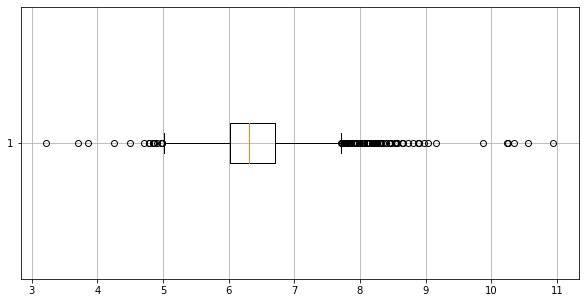

In [47]:
# Boxplot of predicted IMDb scores
fig,ax = plt.subplots(figsize=(10,5))
ax.boxplot(y_pred,vert=False)
ax.grid()
plt.show()

In [48]:
# Determine RMSE (root mean square error)
mse = mean_squared_error(y_test, y_pred, squared=False)
rmse = sqrt(mse)
rmse

0.8904114410395189

In [49]:
# Determine the MAE (mean absolute error)
mae = mean_absolute_error(y_test,y_pred)
mae

0.5918719258893091

In [50]:
# Determine the r2_score
r2score = r2_score(y_test,y_pred)
r2score

0.3161673359285546

In [51]:
# Get equation of the line
(slope, intercept, r_value, p_value, std_err) = linregress(y_pred,y_test)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f'The p-value is: {p_value:.3f}')

y = 0.82x + 1.13
The p-value is: 0.000


In [52]:
# Calculate the regression line y values from slope and intercept
regress_values = [(pred * slope + intercept) for pred in y_pred]

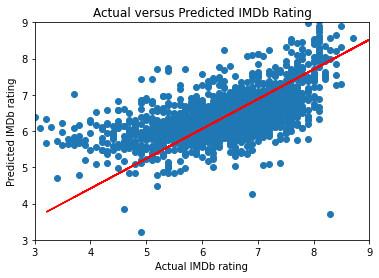

In [53]:
# Plot actual vs. predicted rating
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
plt.plot(y_pred,regress_values,'r')
ax.set_xlabel('Actual IMDb rating')
ax.set_ylabel('Predicted IMDb rating')
plt.title('Actual versus Predicted IMDb Rating')
plt.ylim((3, 9))
plt.xlim(3, 9) 
plt.show()